In [2]:
%matplotlib notebook
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt 
import regress_teddy

filename = 'wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename, header=31, 
                 na_values=-999, parse_dates=[[8,9]])

## Total Nitrate and Phosphate

In [3]:
x = df['NITRAT']
y = df['PHSPHT']

ii = (np.isfinite(x) & np.isfinite(y))
deep500 = (df['CTDPRS']>500)
reg_nitphos = stats.linregress(x[ii],y[ii])
print('Nitrate and Phosphate regression:', reg_nitphos)
'\n'
print('  ')
'\n'
regressline = (reg_nitphos[0]*x + reg_nitphos[1])

regress2 = regress_teddy.type2regress(x[ii],y[ii])
print('Nitrate and Phosphate type II regression:', regress2)
'\n'
print('  ')
'\n'
regress2line = (regress2[0]*x+regress2[1])

rsquared = (reg_nitphos[2])**2
print("the R^2 of the Nitrate and Phosphate regression is", rsquared)
'\n'
print('  ')
'\n'
CIslope = regress_teddy.slope_ci(x[ii],y[ii])
print('The confidence interval for the slope of the Type I regression is:',CIslope )

Nitrate and Phosphate regression: LinregressResult(slope=0.063105263408342674, intercept=0.43279580125334571, rvalue=0.98732121974431175, pvalue=0.0, stderr=0.00033650997590726182)
  
Nitrate and Phosphate type II regression: (0.063915635708391996, 0.41483006974662651)
  
the R^2 of the Nitrate and Phosphate regression is 0.974803190957
  
The confidence interval for the slope of the Type I regression is: (0.063102506554865476, 0.063108020261819872)


## Plot Nitrate and Phosphate samples deeper than 500 dbar 

In [4]:
x = df['NITRAT']
y = df['PHSPHT']

ii = (np.isfinite(x) & np.isfinite(y))
deep500 = (df['CTDPRS']>500)
reg_nitphos = stats.linregress(x[ii][deep500],y[ii][deep500])
print('Nitrate and Phosphate regression:', reg_nitphos)
'\n'
print('  ')
'\n'
regressline = (reg_nitphos[0]*x + reg_nitphos[1])

regress2 = regress_teddy.type2regress(x[ii][deep500],y[ii][deep500])
print('Nitrate and Phosphate type II regression:', regress2)
'\n'
print('  ')
'\n'
regress2line = (regress2[0]*x+regress2[1])

rsquared = (reg_nitphos[2])**2
print("the R^2 of the Nitrate and Phosphate regression is", rsquared)

Nitrate and Phosphate regression: LinregressResult(slope=0.044318374817489251, intercept=1.2256295832176192, rvalue=0.60139317146466897, pvalue=5.8218509182965326e-11, stderr=0.0060091226782144017)
  
Nitrate and Phosphate type II regression: (0.073692846743759366, -0.00048185675055600896)
  
the R^2 of the Nitrate and Phosphate regression is 0.361673746684


<IPython.core.display.Javascript object>


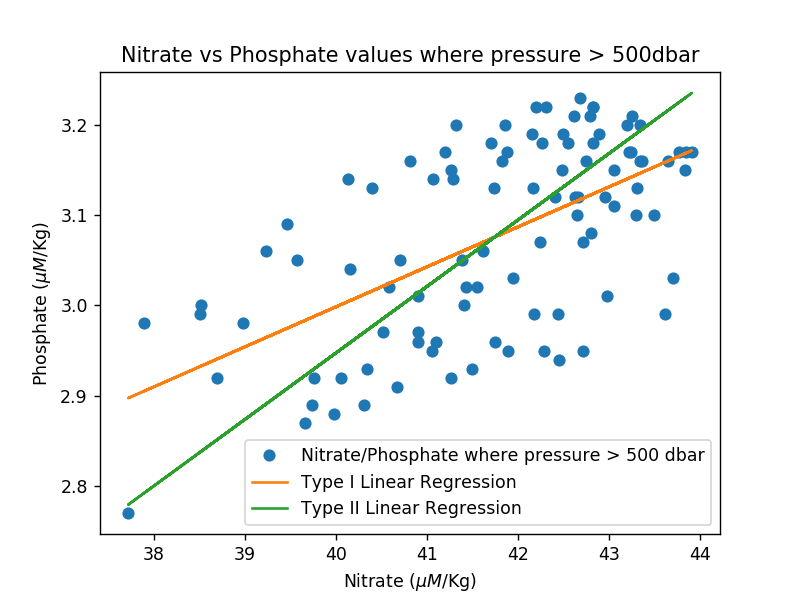

In [5]:
deep500 = (df['CTDPRS']>500)
plt.figure()
plt.plot(df['NITRAT'][deep500],df['PHSPHT'][deep500],'o', label = 'Nitrate/Phosphate where pressure > 500 dbar')
plt.plot(df['NITRAT'][deep500], regressline[deep500], label = 'Type I Linear Regression')
plt.title('Nitrate vs Phosphate values where pressure > 500dbar')
plt.xlabel('Nitrate ($\mu M$/Kg)')
plt.ylabel('Phosphate ($\mu M$/Kg)')
plt.plot(df['NITRAT'][deep500],regress2line[deep500], label = 'Type II Linear Regression')
plt.legend()

In [49]:
CI500slope = regress_teddy.slope_ci(x[ii][deep500],y[ii][deep500])
print('Confidence interval for the slope of the Type I regression between Nitrate and Phosphate = ', CI500slope)

Confidence interval for the slope of the Type I regression between Nitrate and Phosphate =  (0.044208032594682138, 0.044428717040296363)


In [6]:
rcritval = regress_teddy.rcrit(len(x[ii][deep500])-2)
print('R critical value for the regression of Nitrate and Phosphate', rcritval)

R critical value for the regression of Nitrate and Phosphate 0.00641660565967


Comment on:

<span style="color:blue">1. the strength and significance of the correlation in #1 </span>

    There is a strong, positive correlation in Nitrate and Phosphate, and the variability in Phosphate explains about 97% of the variability in Phosphate.
    
<span style="color:blue">2. the applicability of a Type I or Type II linear regression model</span>

    The Type II linear regression model is more appropriate than the Type I linear regression model because there is uncertainty in both variables. 

<span style="color:blue">3. your oceanographic interpretation</span>

    The redfield ratio says the relationship between nitrate and phosphate should be 1:16 (or 0.0625). The confidence interval of the slope of the line, interpreted as the change in phosphate/change in nitrate, is (0.063102, 0.063108). While it is not exact, it is very close (0.0631*16 = 1.0096). As for the slope of the values in water deeper than the pressure of 500 dbar (~500m), the confidence inverval of the slope is (0.0442, 0.0444) which is slightly lower than the expected ratio, and the slope of the dataset as a whole. The type II regression slope for the data (0.0737) is slightly higher than, but closer to, the expected ratio. This is also the regression I would recommend because of the nature of the data, as explained in number 2 above. In a quick google search of the redfield ratio (stress on very quick, in full honesty, this comes from wikipedia) I found that in 2001, the redfield ratio was updated to 1:14 (P:N, which is 0.0714) which is very close to the slope of the Type II Regression slope for data > 500dbar.
